<center><h1>ENERGY PREDICTION SYSTEM</h1></center>

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import pickle

In [3]:
df=pd.read_csv("Energy_consumption_dataset.csv")
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [4]:
#check for nulls
df.isna().any()

Month                False
Hour                 False
DayOfWeek            False
Holiday              False
Temperature          False
Humidity             False
SquareFootage        False
Occupancy            False
HVACUsage            False
LightingUsage        False
RenewableEnergy      False
EnergyConsumption    False
dtype: bool

In [5]:
#checking data types
df.dtypes

Month                  int64
Hour                   int64
DayOfWeek             object
Holiday               object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object

In [6]:
#convert to number
df[['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']]=df[['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']].apply(LabelEncoder().fit_transform)

In [7]:
df.dtypes

Month                  int64
Hour                   int64
DayOfWeek              int32
Holiday                int32
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage              int32
LightingUsage          int32
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object

In [8]:
df.head(10)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,2,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,75.364373
1,1,1,2,0,27.731651,54.225919,1411.064918,1,1,1,21.831384,83.401855
2,1,2,2,0,28.704277,58.907658,1755.715009,2,0,0,6.764672,78.270888
3,1,3,2,0,20.080469,50.371637,1452.316318,1,0,1,8.623447,56.519850
4,1,4,2,0,23.097359,51.401421,1094.130359,9,1,0,3.071969,70.811732
5,1,5,2,1,29.576037,36.824263,1871.709180,6,0,0,17.626690,84.321885
6,1,6,2,1,25.131167,35.709622,1607.001228,6,1,0,24.264702,76.165791
7,1,7,2,1,23.182844,31.679920,1633.955330,8,0,0,27.517099,74.131906
8,1,8,2,0,25.391999,46.399364,1240.309224,6,1,0,2.307595,78.206236
9,1,9,2,0,22.212549,32.418464,1705.420336,1,1,0,29.140071,77.992214


In [9]:
df.describe()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,2.984000,0.468800,24.946823,45.478146,1507.403201,4.576000,0.50000,0.491400,15.201195,76.794919
std,3.588687,6.888306,1.996632,0.499076,3.041678,8.972690,293.147209,2.906185,0.50005,0.499976,9.157038,9.231573
min,1.000000,0.000000,0.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.00000,0.000000,0.006642,53.263278
25%,3.000000,6.000000,1.000000,0.000000,22.453790,38.111104,1253.906598,2.000000,0.00000,0.000000,7.477928,70.419588
50%,6.000000,11.000000,3.000000,0.000000,24.831846,45.793124,1513.581105,5.000000,0.50000,0.000000,15.343830,76.696267
75%,9.000000,18.000000,5.000000,1.000000,27.427281,52.696651,1754.846457,7.000000,1.00000,1.000000,22.889997,83.246274
max,12.000000,23.000000,6.000000,1.000000,29.998671,59.969085,1999.982252,9.000000,1.00000,1.000000,29.965327,99.201120


In [10]:
X=df.drop(['EnergyConsumption'], axis=1)
y=df['EnergyConsumption']

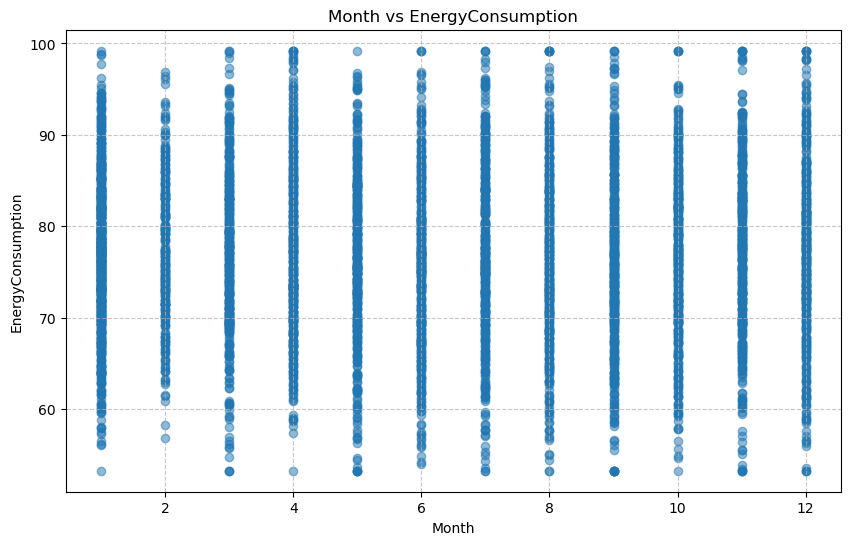

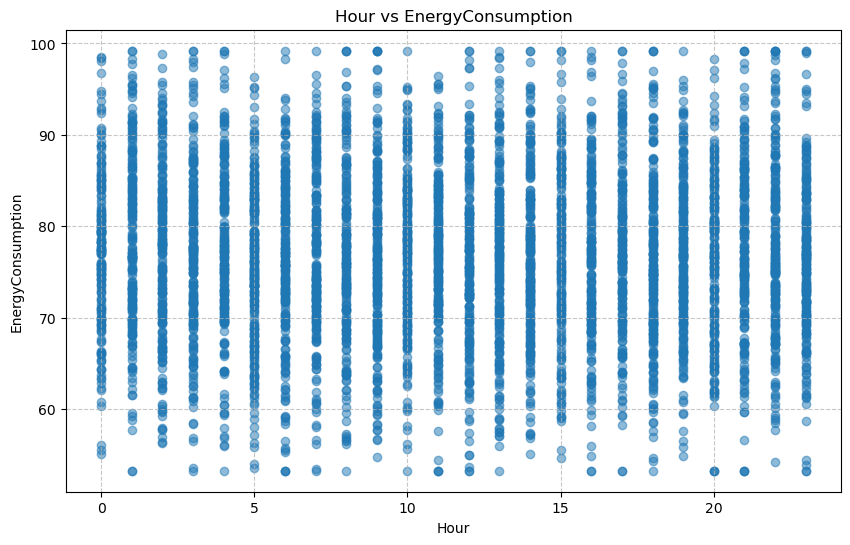

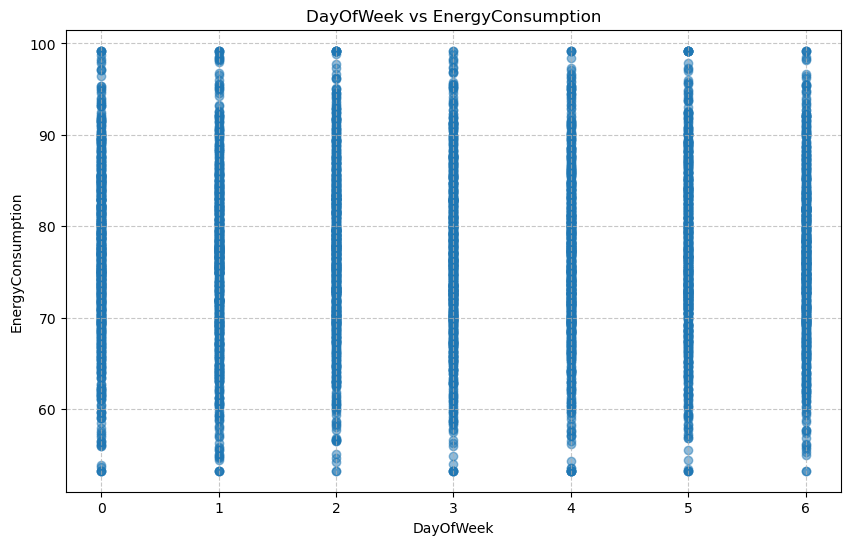

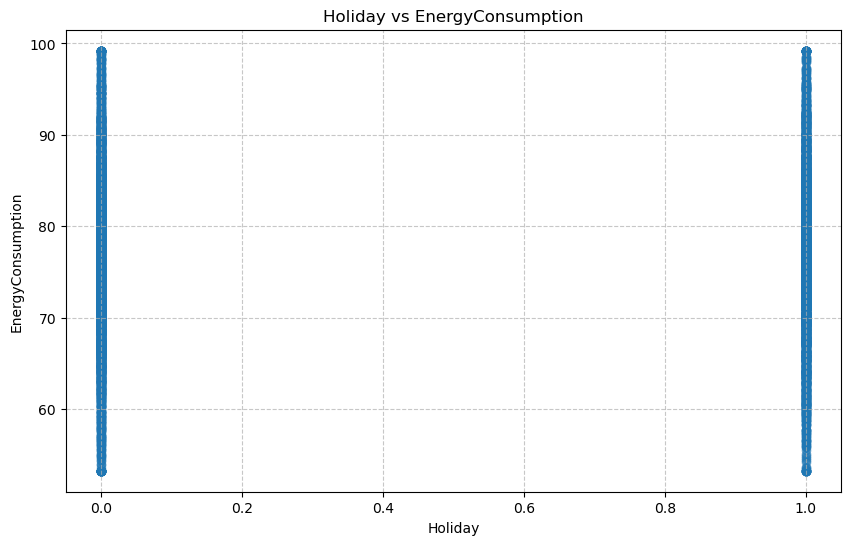

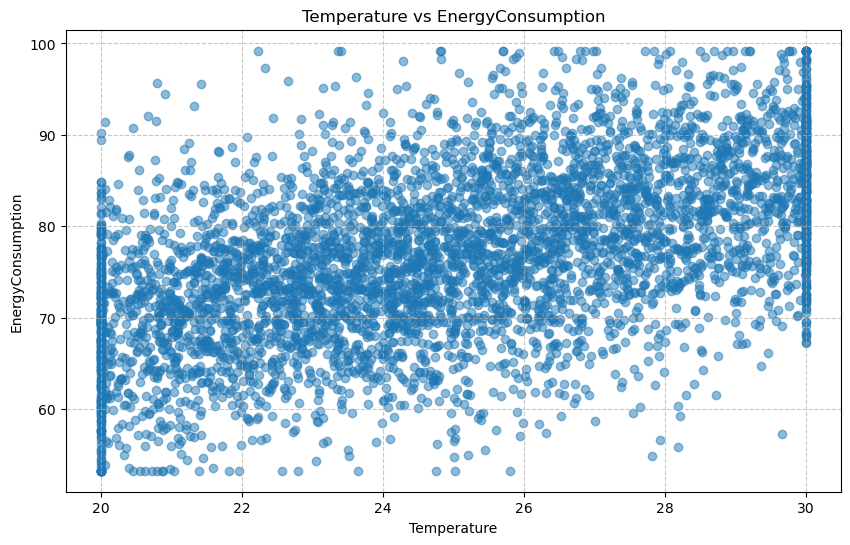

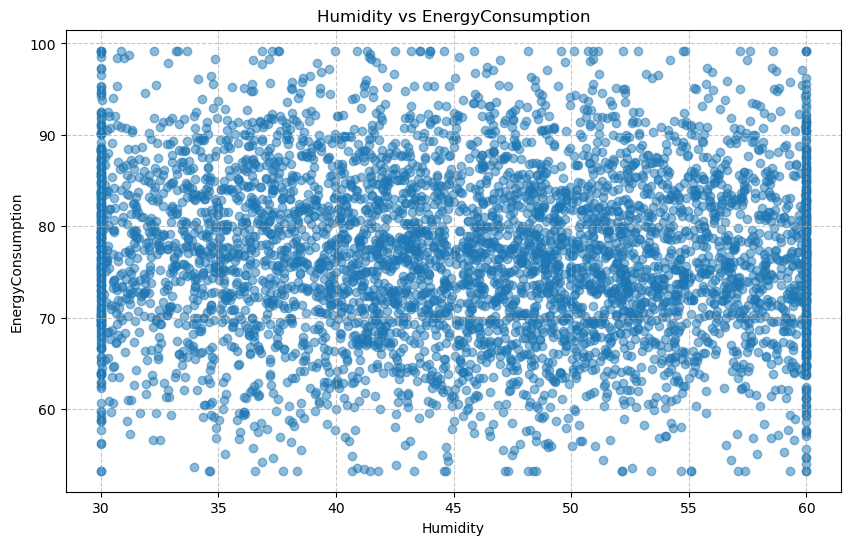

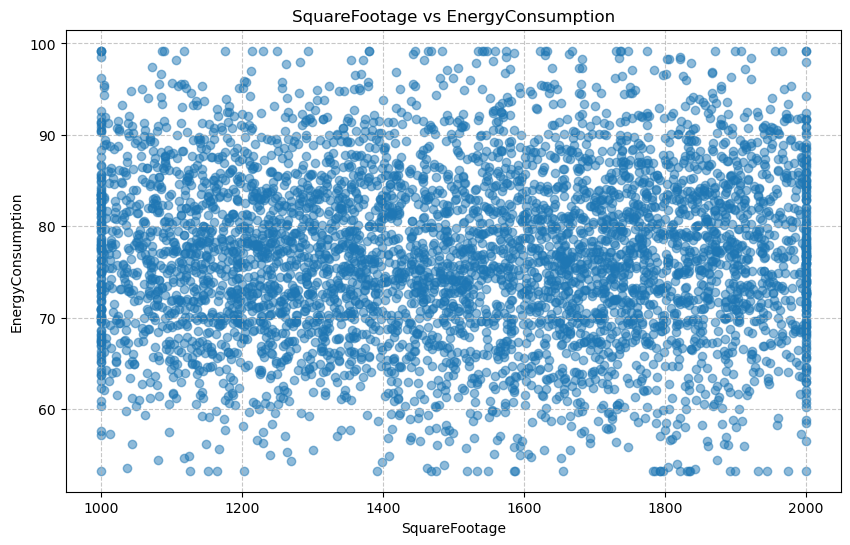

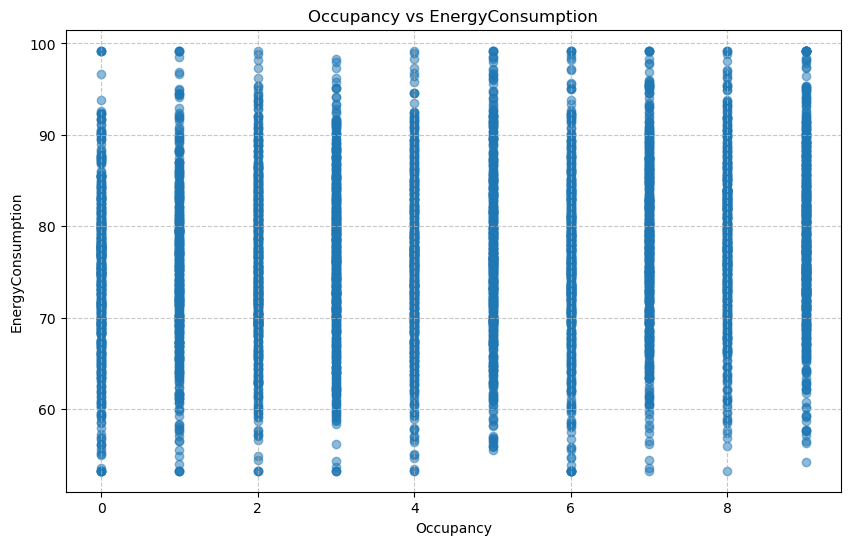

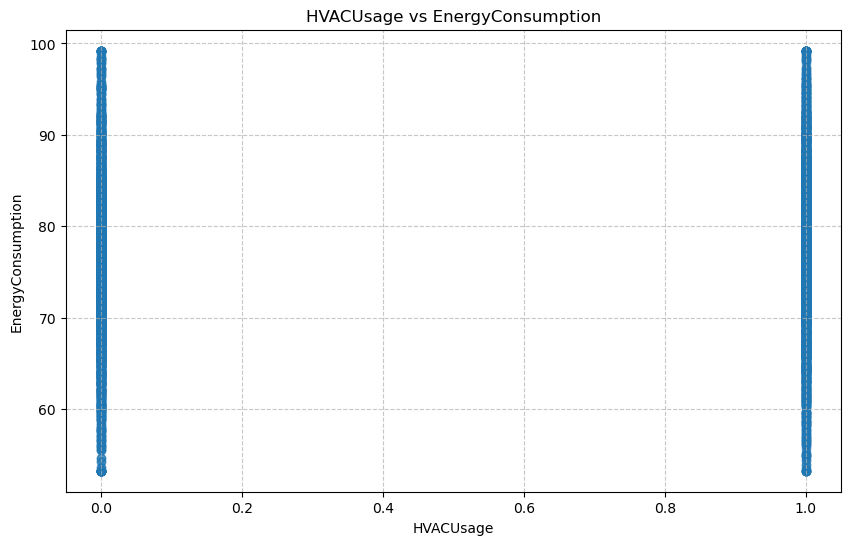

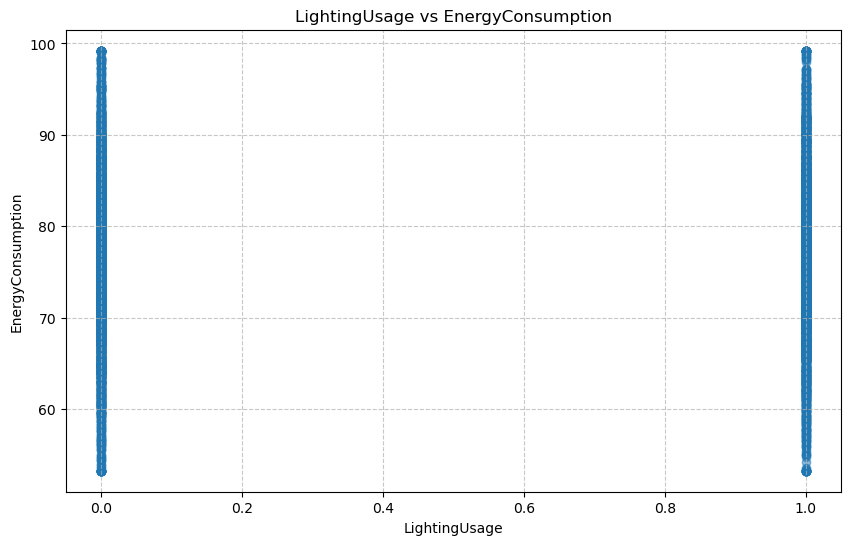

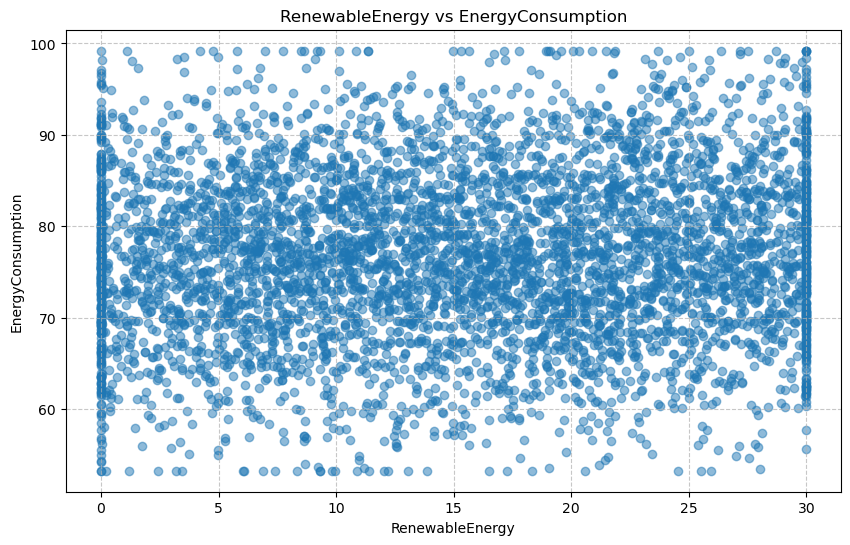

In [11]:
# All features are valid, but target column name needs to be fixed
features = ['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity', 
          'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy']


y_line = 'EnergyConsumption'  

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[y_line], alpha=0.5)
    plt.title(f'{feature} vs {y_line}')
    plt.xlabel(feature)
    plt.ylabel(y_line)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [12]:
X.head(10)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy
0,1,0,2,0,25.139433,43.431581,1565.693999,5,1,0,2.774699
1,1,1,2,0,27.731651,54.225919,1411.064918,1,1,1,21.831384
2,1,2,2,0,28.704277,58.907658,1755.715009,2,0,0,6.764672
3,1,3,2,0,20.080469,50.371637,1452.316318,1,0,1,8.623447
4,1,4,2,0,23.097359,51.401421,1094.130359,9,1,0,3.071969
5,1,5,2,1,29.576037,36.824263,1871.709180,6,0,0,17.626690
6,1,6,2,1,25.131167,35.709622,1607.001228,6,1,0,24.264702
7,1,7,2,1,23.182844,31.679920,1633.955330,8,0,0,27.517099
8,1,8,2,0,25.391999,46.399364,1240.309224,6,1,0,2.307595
9,1,9,2,0,22.212549,32.418464,1705.420336,1,1,0,29.140071


In [13]:
y.head(10)

0    75.364373
1    83.401855
2    78.270888
3    56.519850
4    70.811732
5    84.321885
6    76.165791
7    74.131906
8    78.206236
9    77.992214
Name: EnergyConsumption, dtype: float64

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.5, random_state=42)

df.plot(subplots=True, layout=(4, 5), figsize=(20,20))
plt.show()

In [16]:
model=RandomForestRegressor(n_estimators=100, random_state=42)

In [17]:
fitted_model=model.fit(X_train, y_train)
pred=fitted_model.predict(X_test)

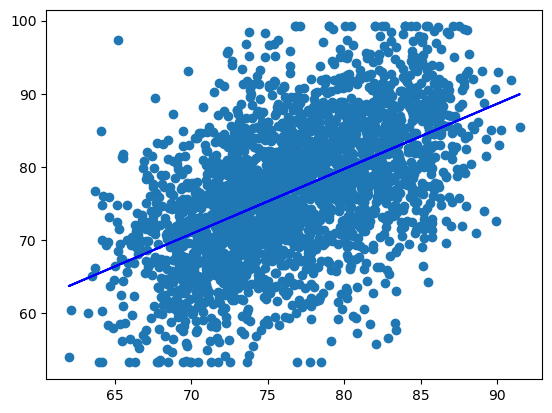

In [18]:
a,b=np.polyfit(pred, y_test, 1)

plt.scatter(pred, y_test)

plt.plot(pred, a*pred+b, 'b')

plt.show()

In [19]:
with open('model.pkl', 'wb') as file:
    pickle.dump(fitted_model, file)

In [20]:
with open('model.pkl', 'rb') as file:
    loaded_model=pickle.load(file)


In [52]:
model_test_data=pd.DataFrame([[2, 4, 2, 1, 24.32, 42.51, 1413.22, 3, 1, 1, 5.32]], columns=['Month', 'Hour', 'DayOfWeek', 'Holiday', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage', 'LightingUsage', 'RenewableEnergy'])
load_pred=loaded_model.predict(model_test_data)
print('your predicted energy usage is : ' , load_pred)

your predicted energy usage is :  [71.65095936]
